In [240]:
import  pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
STUD = pd.read_csv('C:/Skillfactory_rds/HuanMangustina/UNIT_2/stud_math.csv')

In [241]:
STUD
'''Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - 
образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике'''

"Посмотрим на переменные, которые содержит датасет:\n\n1 school — аббревиатура школы, в которой учится ученик\n\n2 sex — пол ученика ('F' - женский, 'M' - мужской)\n\n3 age — возраст ученика (от 15 до 22)\n\n4 address — тип адреса ученика ('U' - городской, 'R' - за городом)\n\n5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)\n\n6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)\n\n7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n\n8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n\n9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n\n10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n\n11 reason — причина выбора школы ('home' -

In [242]:
STUD.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [243]:
#Для удобства использования pandas переименуем все столбцы:
STUD.columns = ['school', 'sex', 'age', 'address', 'family_size', 'Parent_status', 'M_edu', 'F_edu',
       'M_job', 'F_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_sup', 'family_sup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'family_rel',
       'free_time', 'go_out', 'health', 'absences', 'score']

In [244]:
STUD

,school,sex,age,address,family_size,Parent_status,M_edu,F_edu,M_job,F_job,reason,guardian,travel_time,study_time,failures,school_sup,family_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [245]:
STUD.info()
#Обратим Сколько в датасете числовых (13)и строковых столбцов (17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   family_size         368 non-null    object 
 5   Parent_status       350 non-null    object 
 6   M_edu               392 non-null    float64
 7   F_edu               371 non-null    float64
 8   M_job               376 non-null    object 
 9   F_job               359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  travel_time         367 non-null    float64
 13  study_time          388 non-null    float64
 14  failures            373 non-null    float64
 15  school_sup          386 non-null    object 
 16  family_s

2


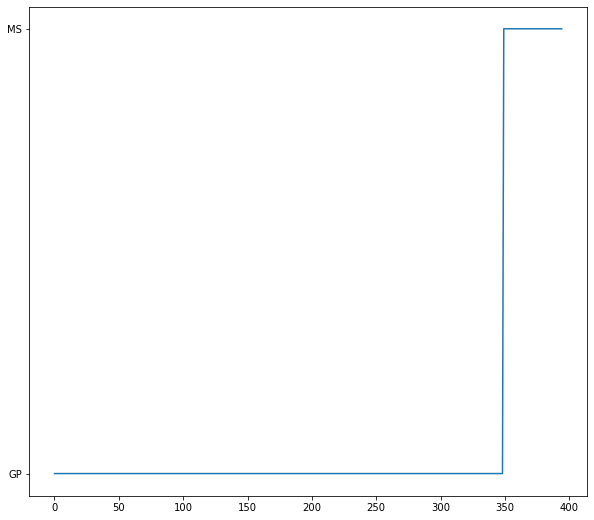

In [246]:
##Теперь рассмотрим все 30 столбцов по отдельности.
#school
import matplotlib.pyplot as plt
print(STUD.school.nunique())
plt.plot(STUD.school)
#в анализе присутствуют данные из двух школ GP и MS 

In [247]:
#sex
len(STUD.sex)
pd.DataFrame(STUD.sex.value_counts())
#девочек 208 и мальчиков 187 . пустых значений нет

,sex
F,208
M,187


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

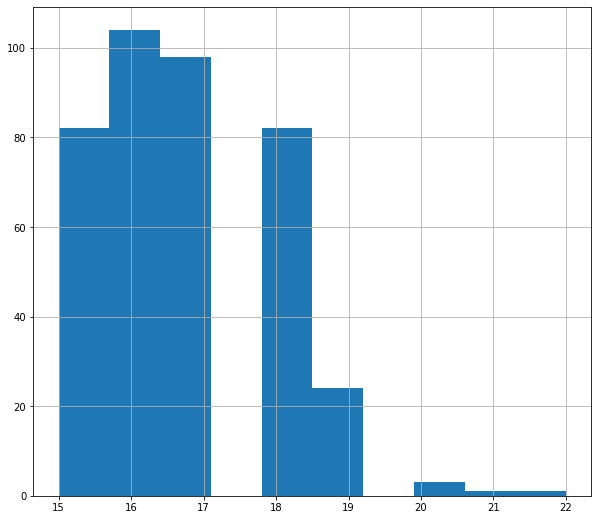

In [248]:
#age
#Этот столбец  числовой и у него  нет пропусков. Как ведет себя распределение этого признака?

STUD.age.hist()
STUD.age.describe()


In [249]:
#Содержит ли этот столбец выбросы? 
Q1 = STUD['age'].quantile(q=0.25, interpolation='midpoint')
Q3 = STUD['age'].quantile(q=0.75, interpolation='midpoint')

V1 = Q1-1.5*(Q3-Q1)

V2 = Q3+1.5*(Q3-Q1)

import numpy as np# получаем индексы рядов, для которых выполняется условие
ind = np.where((STUD['age'] > V2) | (STUD['age'] < V1))
STUD['age'].loc[ind]

#возраст 22 - вброс

247    22
Name: age, dtype: int64

In [250]:
#сколько вброшенных значений age. либо это два второгодника, либо ошибка данных
pd.DataFrame(STUD.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [251]:
#address
len(STUD.address)
pd.DataFrame(STUD.address.value_counts())
#в основном городские жители, пропусков данных нет

,address
U,295
R,83


In [252]:
#family_size
len(STUD.family_size)
pd.DataFrame(STUD.family_size.value_counts())
# пропусков данных нет

,family_size
GT3,261
LE3,107


In [253]:
#Parent_status 
len(STUD.Parent_status)
pd.DataFrame(STUD.Parent_status.value_counts())
# пропущено 45 значений, что больше 10%/ этими данными нельзя пользоваться

,Parent_status
T,314
A,36


In [254]:
len(STUD.Parent_status)

395

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: M_edu, dtype: float64

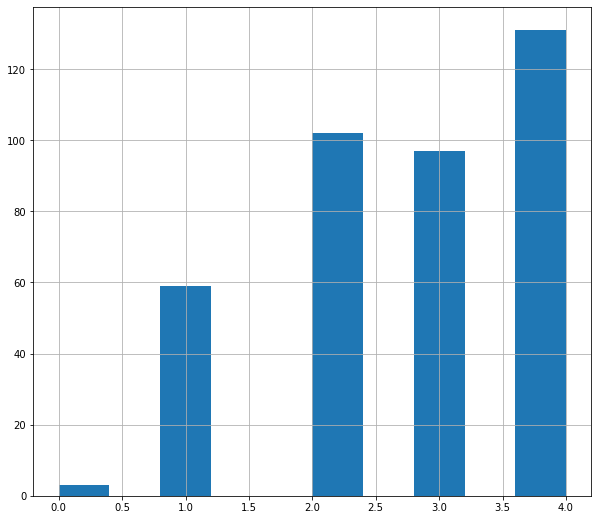

In [255]:
#M_edu
STUD.M_edu.hist()
STUD.M_edu.describe()
# нет 3х значений. не существенно, можно пользоваться

In [256]:
#Содержит ли этот столбец выбросы? 
Q1 = STUD['M_edu'].quantile(q=0.25, interpolation='midpoint')
Q3 = STUD['M_edu'].quantile(q=0.75, interpolation='midpoint')

V1 = Q1-1.5*(Q3-Q1)

V2 = Q3+1.5*(Q3-Q1)

import numpy as np# получаем индексы рядов, для которых выполняется условие
ind = np.where((STUD['M_edu'] > V2) | (STUD['M_edu'] < V1))
STUD['M_edu'].loc[ind]

#вбросов нет

Series([], Name: M_edu, dtype: float64)

In [257]:
pd.DataFrame(STUD.M_edu.value_counts())


,M_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: F_edu, dtype: float64

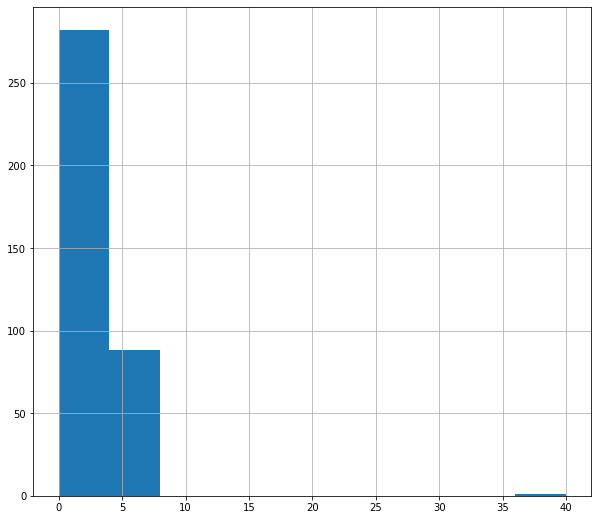

In [258]:
#F_edu
STUD.F_edu.hist()
STUD.F_edu.describe()
#есть ошибки и данные не полные 

In [259]:
pd.DataFrame(STUD.F_edu.value_counts())

,F_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


count       376
unique        5
top       other
freq        133
Name: M_job, dtype: object

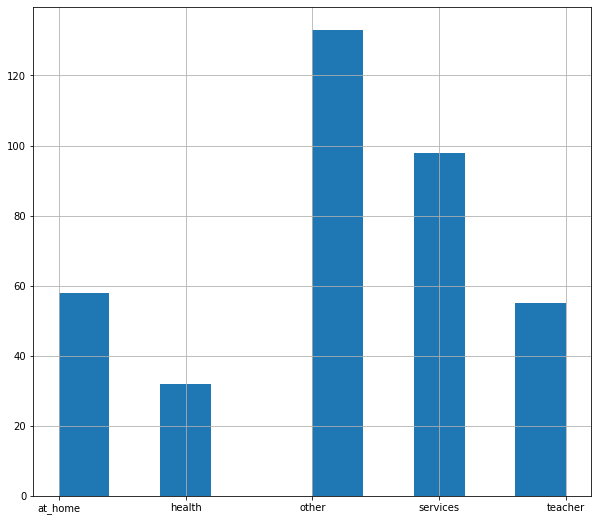

In [260]:
#M_job
STUD.M_job.hist()
STUD.M_job.describe()

count       359
unique        5
top       other
freq        197
Name: F_job, dtype: object

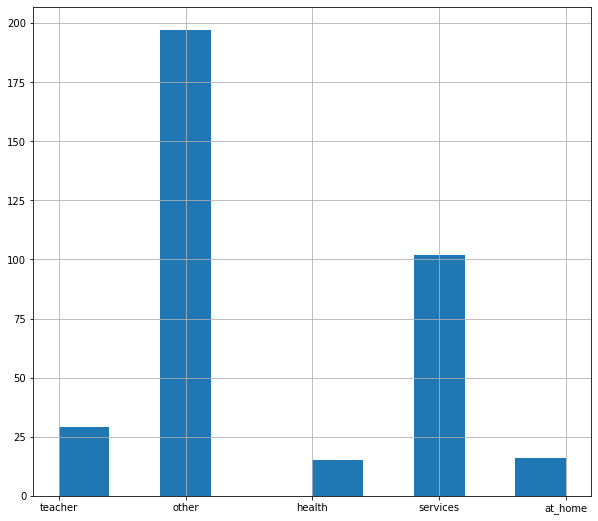

In [261]:
#F_job
STUD.F_job.hist()
STUD.F_job.describe()

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

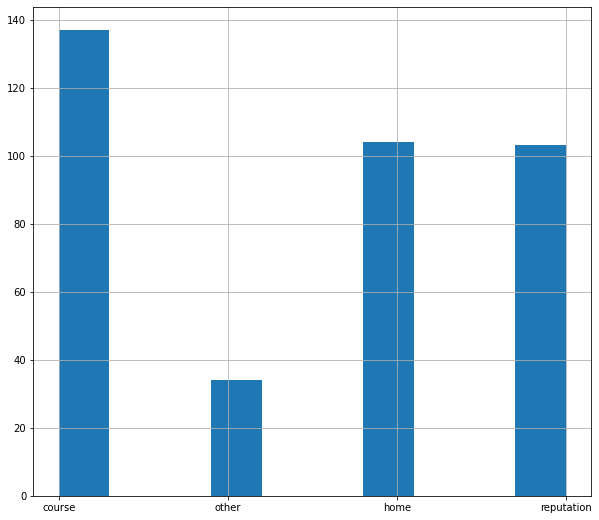

In [262]:
#reason
STUD.reason.hist()
STUD.reason.describe()

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

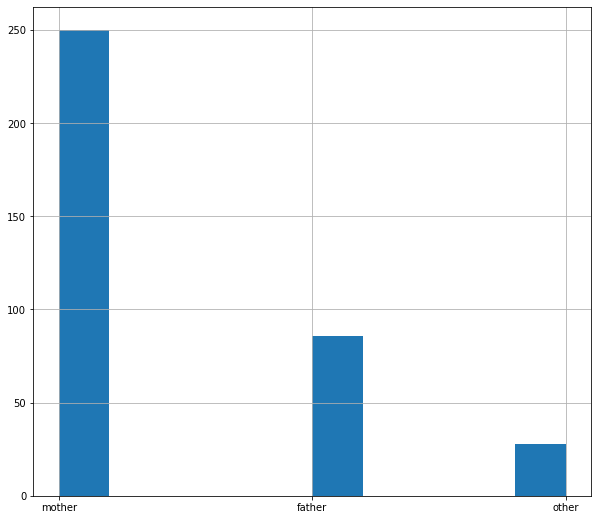

In [263]:
# guardian
STUD.guardian.hist()
STUD.guardian.describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

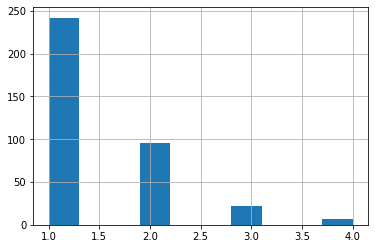

In [56]:
#travel_time 
STUD.travel_time.hist()
STUD.travel_time.describe()

In [264]:
#Содержит ли этот столбец выбросы? 
Q1 = STUD['travel_time'].quantile(q=0.25, interpolation='midpoint')
Q3 = STUD['travel_time'].quantile(q=0.75, interpolation='midpoint')

V1 = Q1-1.5*(Q3-Q1)

V2 = Q3+1.5*(Q3-Q1)

import numpy as np# получаем индексы рядов, для которых выполняется условие
ind = np.where((STUD['travel_time'] > V2) | (STUD['travel_time'] < V1))
STUD['travel_time'].loc[ind]

#забавно, значение 4 воспринимается,  как вброс.

61     4.0
108    4.0
149    4.0
164    4.0
228    4.0
327    4.0
375    4.0
Name: travel_time, dtype: float64

In [58]:
pd.DataFrame(STUD.travel_time.value_counts())

,travel_time
1.0,242
2.0,96
3.0,22
4.0,7


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

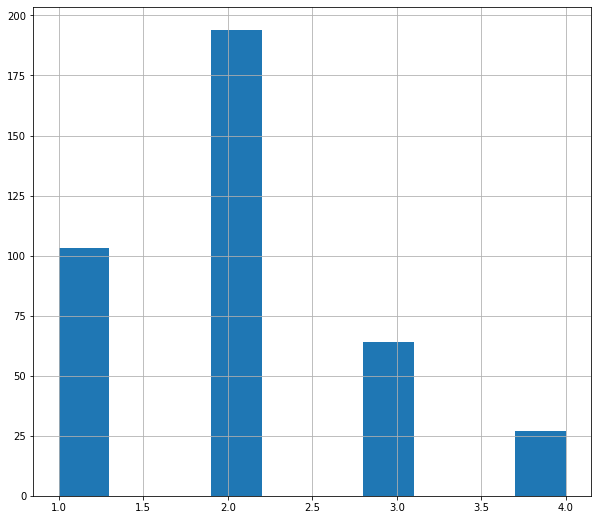

In [265]:
#study_time
STUD.study_time.hist()
STUD.study_time.describe()

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64


,study_time
2.0,194
1.0,103
3.0,64
4.0,27


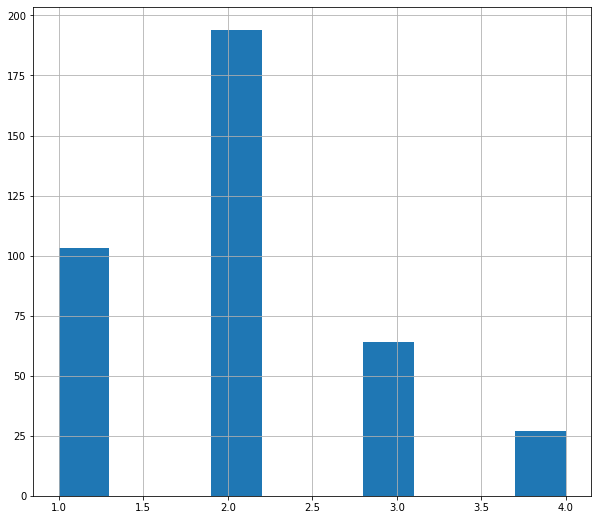

In [266]:
#failures количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
STUD.study_time.hist()
print(STUD.study_time.describe())
# присутствует значение 4, его нет в описании. возможно , это начение 0.
pd.DataFrame(STUD.study_time.value_counts())

In [267]:
#school_sup 
print(pd.DataFrame(STUD.school_sup.value_counts()))
#family_sup 
print(pd.DataFrame(STUD.family_sup.value_counts()))
#paid — дополнительные платные занятия по математике (yes или no)
print(pd.DataFrame(STUD.paid.value_counts()))
# activities — дополнительные внеучебные занятия (yes или no)
print(pd.DataFrame(STUD.activities.value_counts()))
#20 nursery — посещал детский сад (yes или no)
print(pd.DataFrame(STUD.nursery.value_counts()))
#21 higher — хочет получить высшее образование (yes или no)
print(pd.DataFrame(STUD.higher.value_counts()))
#22 internet — наличие интернета дома (yes или no)
print(pd.DataFrame(STUD.internet.value_counts()))
#23 romantic — в романтических отношениях (yes или no)
print(pd.DataFrame(STUD.romantic.value_counts()))

     school_sup
no          335
yes          51
     family_sup
yes         219
no          137
     paid
no    200
yes   155
     activities
yes         195
no          186
     nursery
yes      300
no        79
     higher
yes     356
no       19
     internet
yes       305
no         56
     romantic
no        240
yes       124


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64


,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


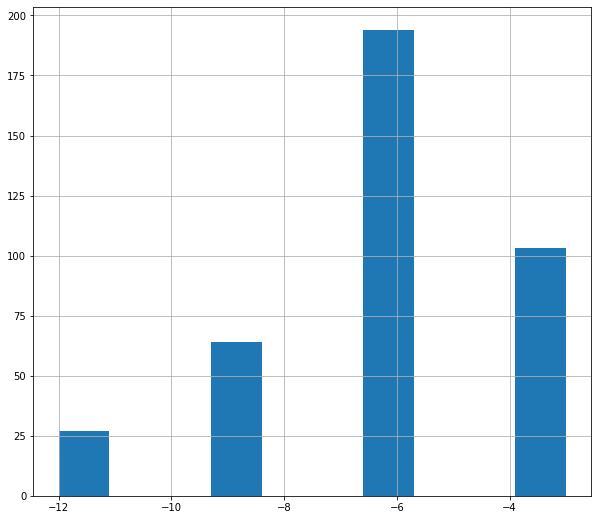

In [268]:
#studytime_granular не понятно .что это?
STUD.studytime_granular.hist()
print(STUD.studytime_granular.describe())

pd.DataFrame(STUD.studytime_granular.value_counts())



count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_rel, dtype: float64
count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64
count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64
count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


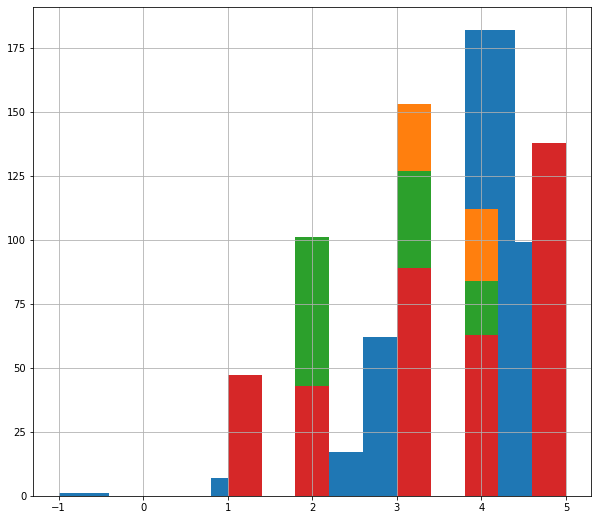

In [269]:
#family_rel 
STUD.family_rel.hist()
print(STUD.family_rel.describe())
#free_time 
STUD.free_time.hist()
print(STUD.free_time.describe())
#go_out 
STUD.go_out.hist()
print(STUD.go_out.describe())
#health
STUD.health.hist()
print(STUD.health.describe())

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


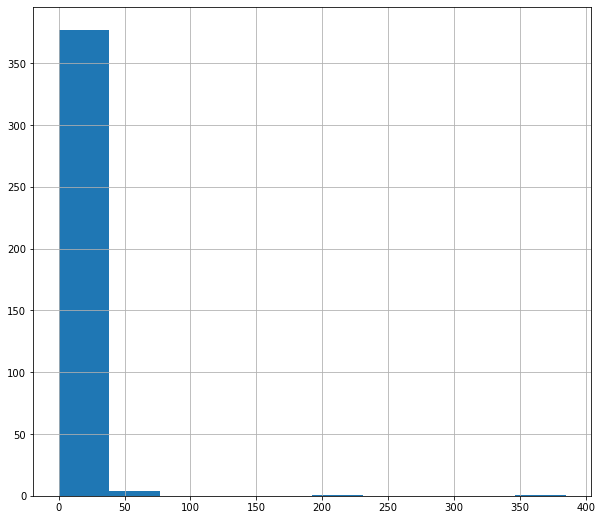

In [271]:
#absences
STUD.absences.hist()
print(STUD.absences.describe())
pd.DataFrame(STUD.absences.value_counts())

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


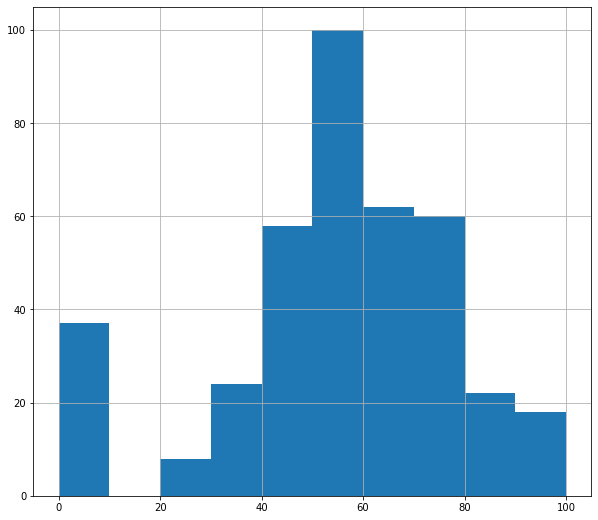

In [273]:
#score — баллы по госэкзамену по математике
STUD.score.hist()
print(STUD.score.describe())
pd.DataFrame(STUD.score.value_counts())

In [ ]:
''' 37 учеников получили 0 баллов.
    после 20 баллов нормальное распределение 
    выбросов нет
    несколько оценок не предоставлено
'''

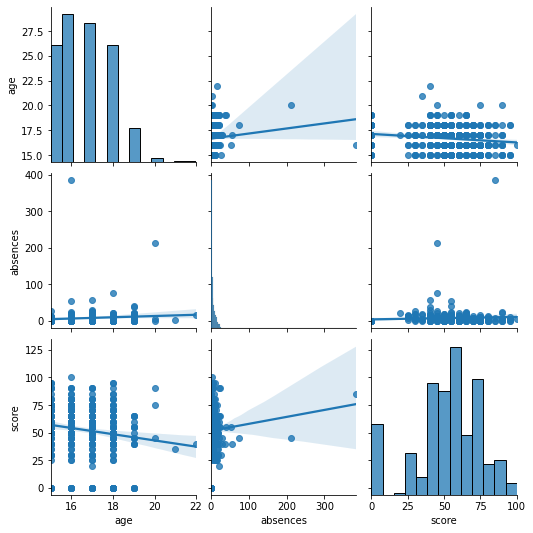

In [274]:
# корреляционный анализ количественных принаков
'''Выясним, какие столбцы коррелируют с оценкой.
Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться
функцией pairplot из модуля seaborn:'''
import seaborn as sns
STUD_NUM = ['age','absences','score']
sns.pairplot(STUD[STUD_NUM], kind='reg')

In [119]:
STUD [STUD_NUM].corr()
#линейной связи absences и score не обнаружено. надо проверить нелинейную связь

,age,absences,score
age,1.000000,0.093592,-0.155726
absences,0.093592,1.000000,0.065283
score,-0.155726,0.065283,1.000000


<AxesSubplot:xlabel='absences', ylabel='score'>

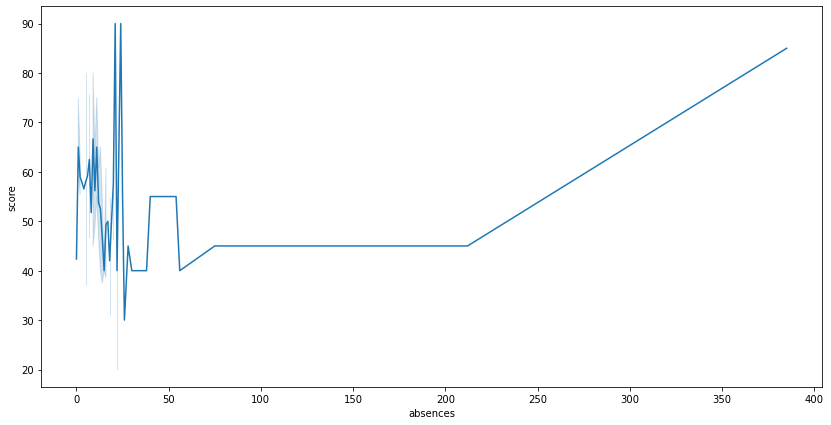

In [275]:
plt.figure(figsize=(14,7))
sns.lineplot(data=STUD, x ='absences', y ='score')
#нелинейная связь тоже не прослеживается

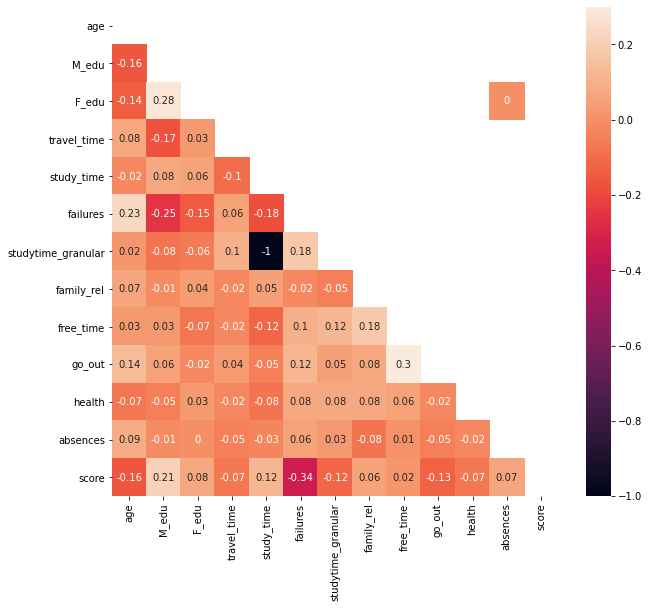

In [276]:
#тепловая карта косичественных и смешанных значений
STUD_NUM = STUD.select_dtypes(include='number').columns
corr_matrix = STUD[STUD_NUM].corr().round(2)
plt.rcParams['figure.figsize']=(10,9)
matrix = np.triu (corr_matrix)
x = sns.heatmap(corr_matrix, mask = matrix, annot = True)

In [ ]:
#studytime_granular повторяет значения studytime с противоположным знаком, 
#данная корреляция делает studytime_granular ненужными.
# F_edu M_edu сильно линейно зависимы : можно использовать для восстановления пропущенных данных.
# либо для генерации дополнительного признака на основе двух .



In [277]:
import seaborn as sns
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
# отдельный дата фрейм для корреляции значений
SCORE_CORR_DF = pd.DataFrame(STUD.corr()['score'].values, index=STUD.corr()[
                             'score'].index, columns=['correlations'])
SCORE_CORR_DF = SCORE_CORR_DF.drop('score')
SCORE_CORR_DF['correlation_amount'] = abs(SCORE_CORR_DF.correlations) #интересуют абсолютные значения
print('коррелирующие значения в порядке убывания')
SCORE_CORR_DF.sort_values(by='correlation_amount', ascending=False)

коррелирующие значения в порядке убывания


,correlations,correlation_amount
failures,-0.344338,0.344338
M_edu,0.213349,0.213349
age,-0.155726,0.155726
go_out,-0.129685,0.129685
study_time,0.115741,0.115741
studytime_granular,-0.115741,0.115741
F_edu,0.078573,0.078573
travel_time,-0.070559,0.070559
health,-0.070460,0.070460
absences,0.065283,0.065283


In [278]:

'''наибольшее влияние оказывает проблемы, возраст.
Положительно влияет образование родителей и сомостоятельные занятия. 
отношени в семье, свободное время и прогулы не сильно влияют на результат экамена '''
STUD
# удалим столбцы со значением корреляции ниже 0.1 и 'studytime_granular'
#STUD.drop('studytime_granular', axis=1, inplace=True)
STUD.drop(SCORE_CORR_DF[SCORE_CORR_DF.correlation_amount <
                        0.1].index, axis=1, inplace=True)
STUD['P_edu'] = STUD[F_edu]+STUD[M_edu] #здесь не смог понять, что не так

NameError: name 'F_edu' is not defined

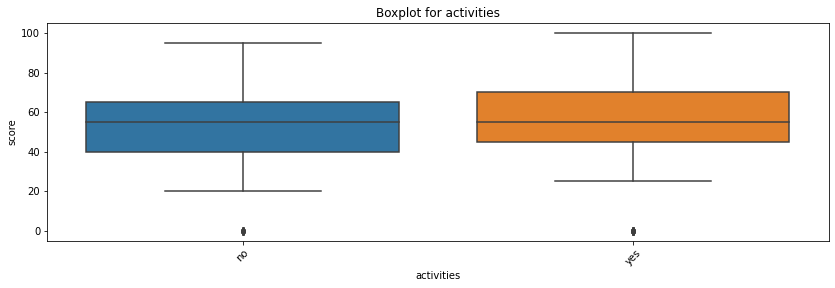

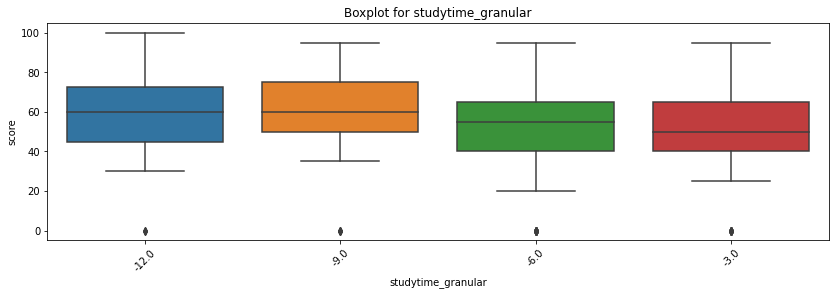

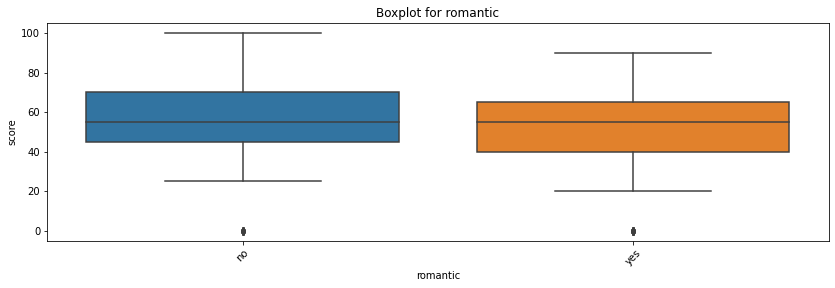

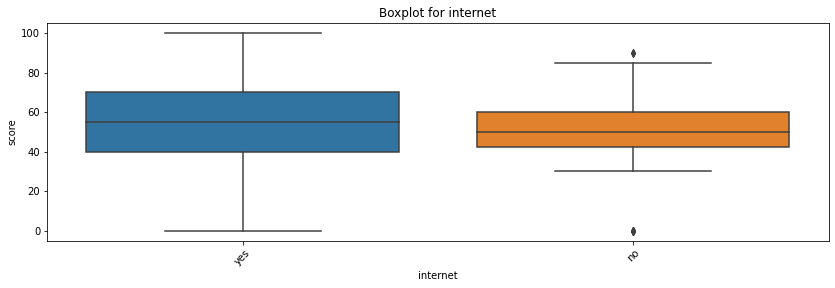

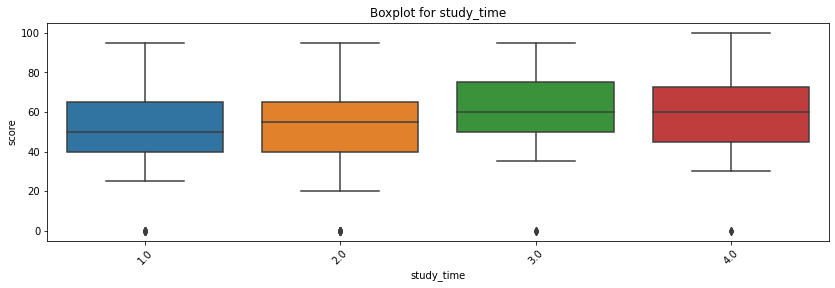

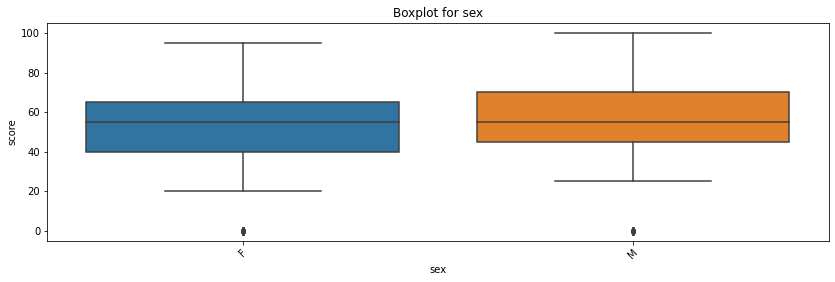

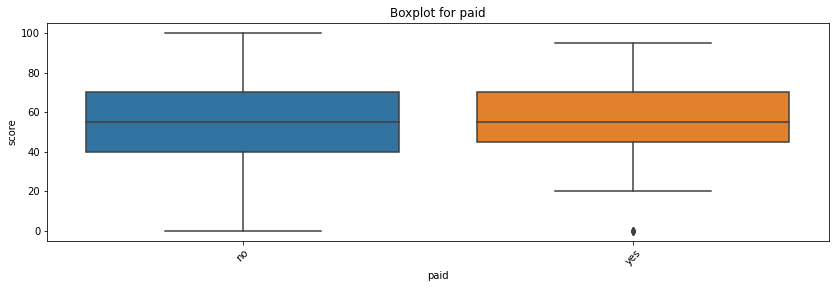

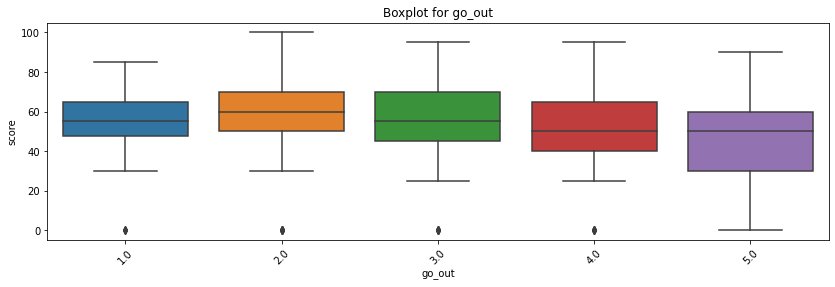

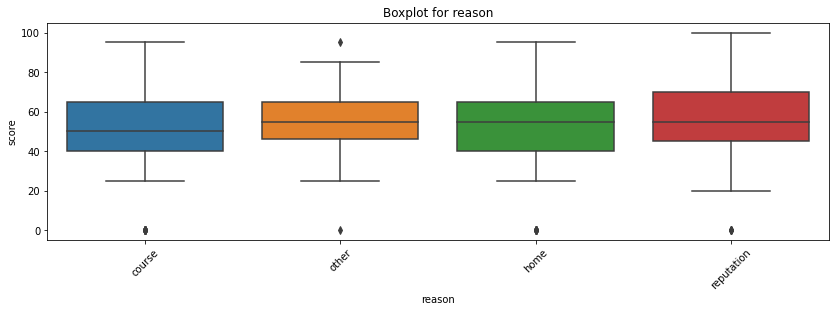

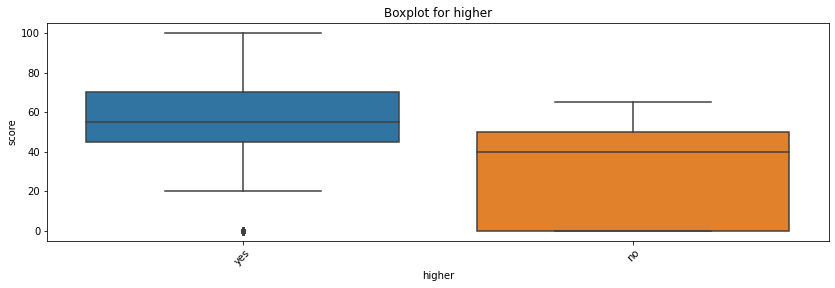

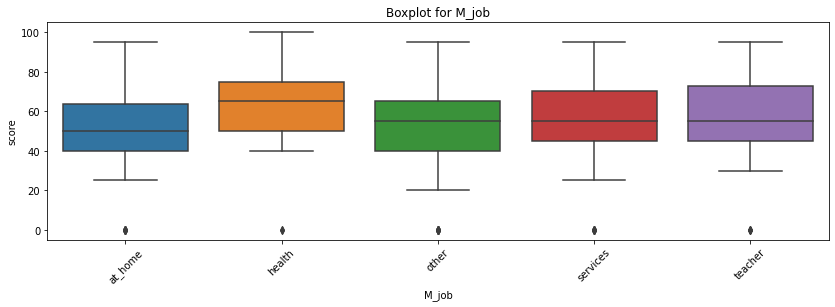

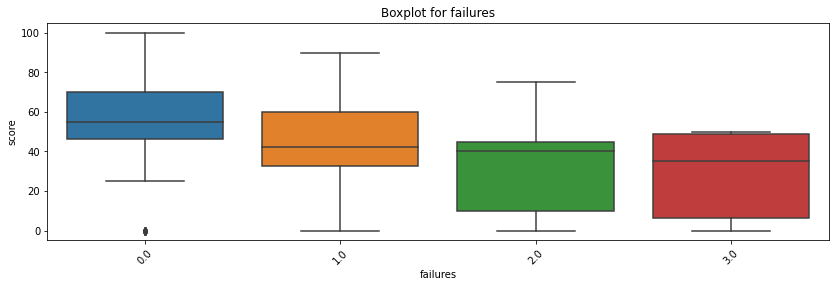

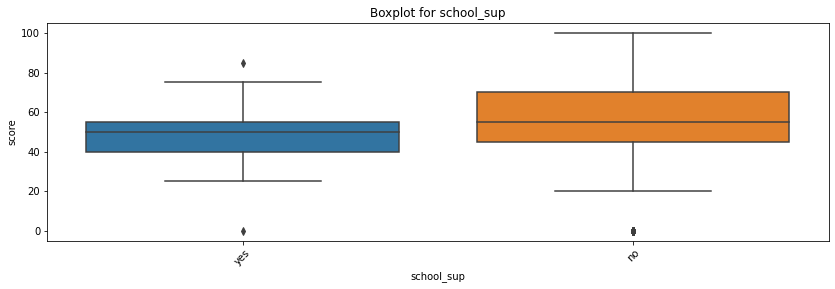

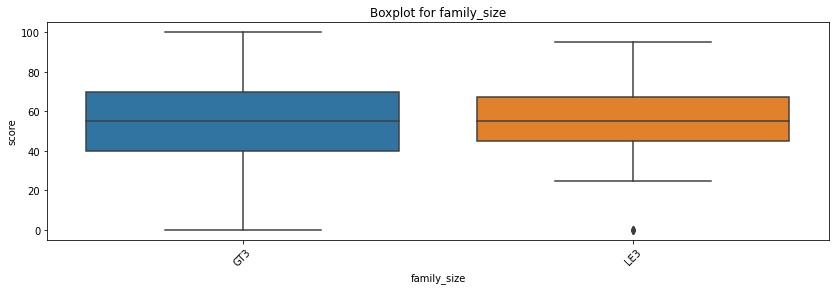

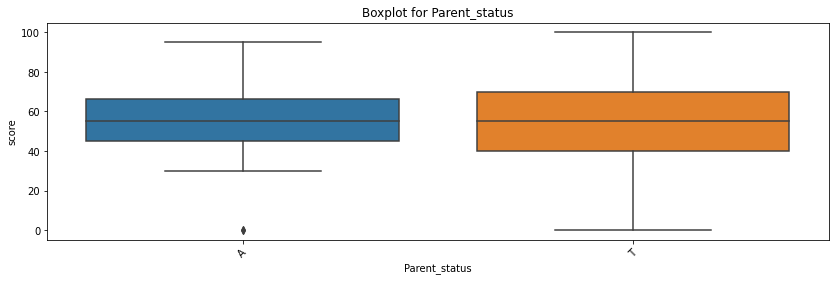

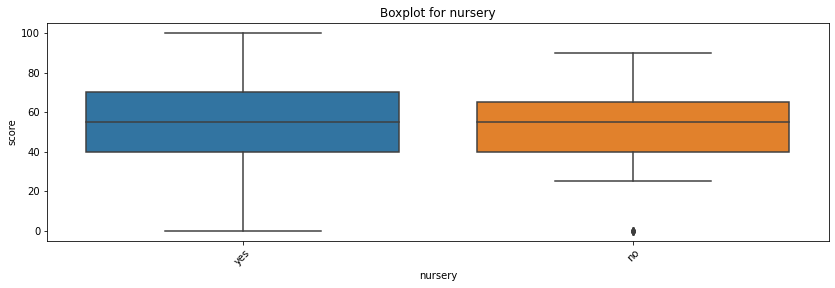

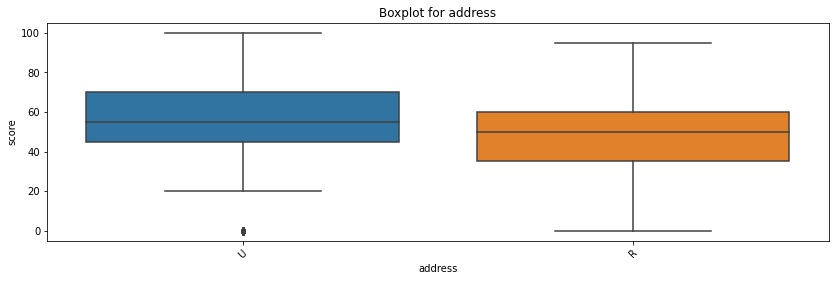

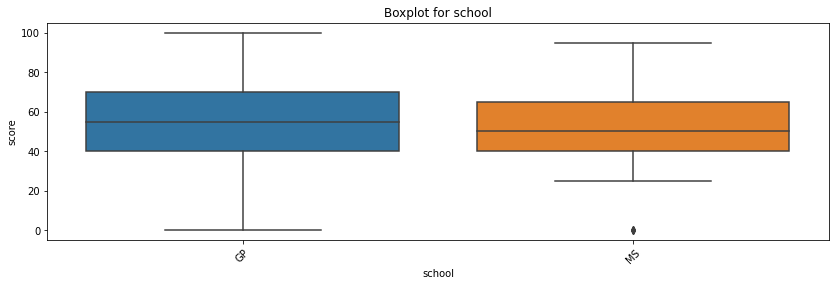

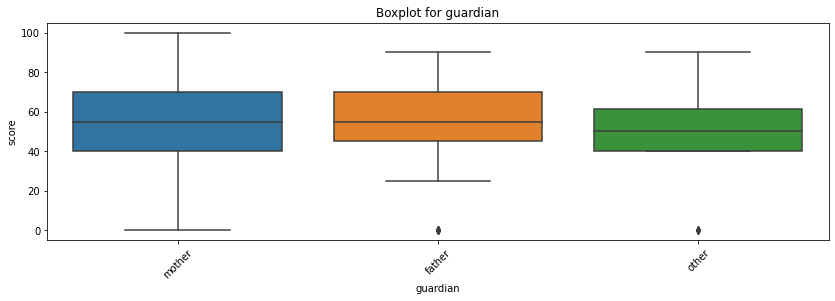

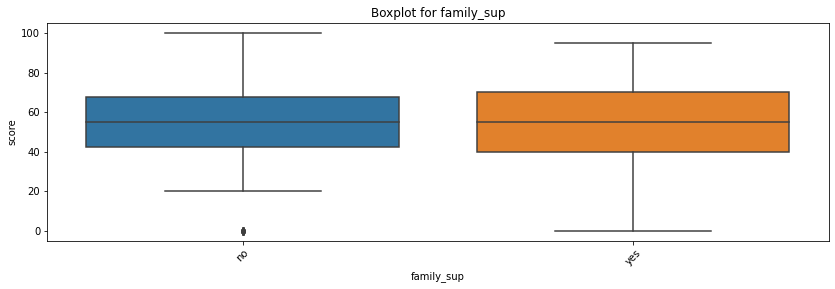

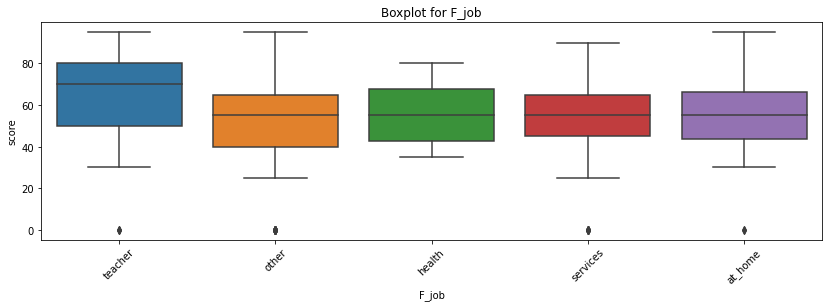

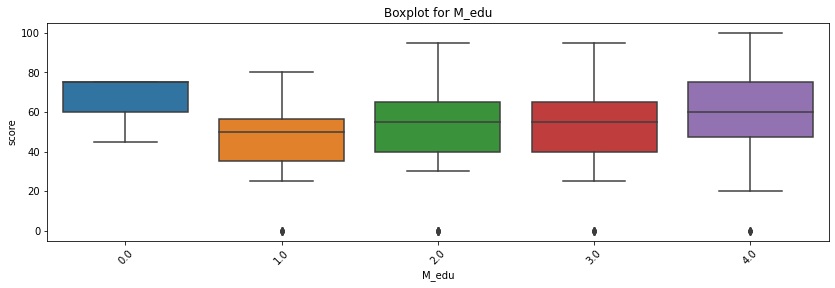

In [279]:
# Анализ номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=STUD.loc[STUD.loc[:, column].isin(STUD.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()




nom_cols = list(set(STUD.columns) - set(['age', 'absences', 'score'])) 
for col in nom_cols:
    get_boxplot(col)

In [ ]:
#промежуточный вывод: почти все данные пердставлют интерес.

In [281]:
'''По графикам похоже, что все параметры,  могут влиять на оценку. 
Однако графики являются лишь вспомогательным инструментом,
настоящую значимость различий может помочь распознать статистика. 
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам,
с помощью теста Стьюдента.'''
def get_stat_dif(column):
    cols = STUD.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(STUD.loc[STUD.loc[:, column] == comb[0], 'score'], 
                        STUD.loc[STUD.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони , позволяет снизить вероятность ложноположительного результата эксперимента
            print('Найдены статистически значимые различия для колонки', column)
            break

In [283]:
for col in nom_cols:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки M_job


In [ ]:
#что-то пошло не так выявились различия только  для колонки M_job

In [287]:
STUD_for_model = STUD.loc[:, ['failures', 'M_edu', 'M_job', 'age', 'go_out', 'study_time', 'F_edu',
                              'travel_time', 'health', 'absences', 'family_rel', 'free_time']]
STUD_for_model.head()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['F_edu', 'travel_time', 'health', 'absences', 'family_rel',\n       'free_time'],\n      dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
''' Данные достаточно чистые: 
количество пропущенных значений вырируется от 1% до 11% Есть 3 переменные данные по которым есть полностью . 
Ошибки обнаружены в F_edu family_rel 
переменная absences содержит 2 аномальных значения (рекомендуется поменять на медиану,
с целью сохранения информации в других предикторах.)
    Послед подробного осмотра принято решение:
удалить пропуски из целевой переменной за ненадобностью.
оставить значение 0 в score для выяснения возможности моделирования в этих случаях.
    В результате корреляционного анализа: 
обнаружена сильная обратная связь studytime и studytime_granular, второй удален за ненадобностью 
обнаружена линейная зависимость между F_edu M_edu которую можно использовать для создания нового
значимого признака и взаимного восстановления пропусков.
исключены переменные с коэффициенотом корреляции менее 0.1 по модулю как самые бесперсперктивные на этапе EDA
    Анализ номинативных и смешанных переменных с помощью boxplot  позволил выделить значимые признаки.

для моделирования рекомендуется использовать колонки 
'sex','failures', 'M_edu', 'M_job', 'age', 'go_out', 'study_time', 'F_edu', 'F_job'
                              'travel_time', 'health', 'absences', 'highter', 'romantic'
 эти данные представляют наибольший интерес.'''''